## Exercises

These exercises should go in a notebook or script named explore.

In [24]:
import pyspark
from pyspark.sql.functions import *
import wrangle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.ion()
# tweak the matplotlib style defaults
plt.rc("figure", figsize=(13, 7))
plt.rc("font", size=14)
plt.style.use("ggplot")


In [25]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

df = wrangle.wrangle_311(spark)

[wrangle.py] reading case.csv
[wrangle.py] handling data types
[wrangle.py] parsing dates
[wrangle.py] adding features
[wrangle.py] joining departments


### Answer the questions below by using a combination of the techniques discussed in the lesson that you think is appropriate.

> How many different cases are there, by department?

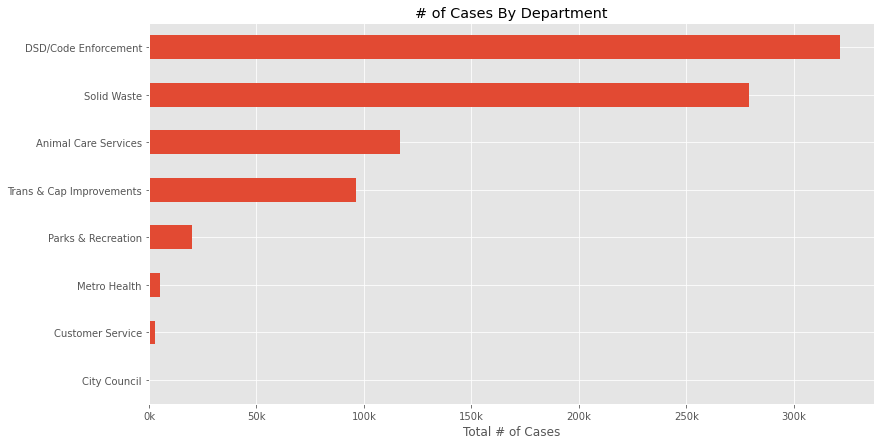

In [26]:
#df.groupby("department", "service_request_type").count().show()
def format_number(x, *args):
    return "{:.0f}k".format(x / 1000)


(
    df.groupby("department")
    .count()
    .toPandas()
    .set_index("department")["count"]
    .sort_values()
    .plot.barh()
)
plt.gca().set(
    ylabel="", xlabel="Total # of Cases", title="# of Cases By Department"
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

 > Does the percentage of cases that are late vary by department?

[Text(0, 0.5, ''),
 Text(0.5, 0, '% of Cases Closed After Due Date'),
 Text(0.5, 1.0, '% of Late Cases By Department')]

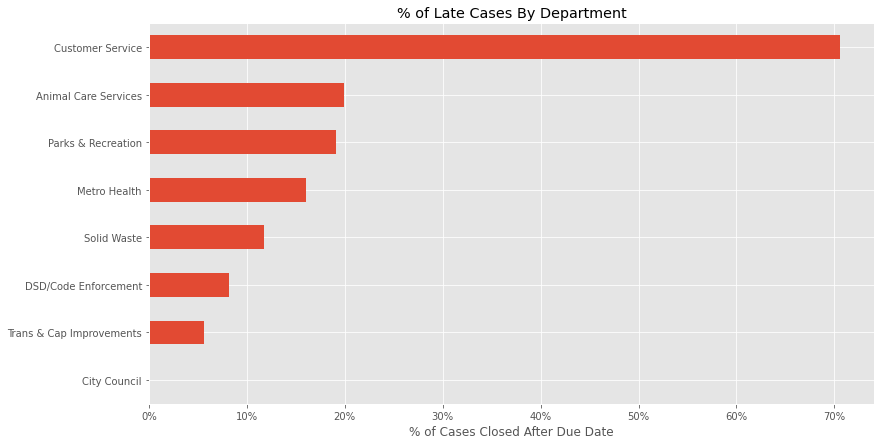

In [27]:
(
    df.withColumn("case_late", col("case_late").cast("int"))
    .groupby("department")
    .agg(avg("case_late").alias("p_cases_late"))
    .toPandas()
    .set_index("department")
    .p_cases_late.sort_values()
    .plot.barh()
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter("{:.0%}".format))
plt.gca().set(
    ylabel="",
    xlabel="% of Cases Closed After Due Date",
    title="% of Late Cases By Department",
)

> On average, how late are the late cases by department?

> What is the service type that is the most late? Just for Parks & Rec?

> For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

> Does whether or not its a weekend matter for when a case is opened/closed?

> On average, how many cases are opened a day for the Customer Service department?

> Does the number of service requests for the solid waste department vary by day of the week?